In [6]:
# ============================================================
# NOTEBOOK 1: EDA + DATA CLEANING
# Dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# ============================================================
# 1. LOAD DATASET
# ============================================================
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Basic info
print("Shape:", df.shape)
df.info()


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [8]:
# CLEANING & DATA PREPARATION

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))

# Check missing values after conversion
df.isna().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
# Remove missing values created from invalid TotalCharges
df = df.dropna()

print("New shape after cleaning:", df.shape)


New shape after cleaning: (7032, 21)


In [10]:
# CHECK DUPLICATES
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 0


In [12]:
# BASIC DESCRIPTIVE STATISTICS
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


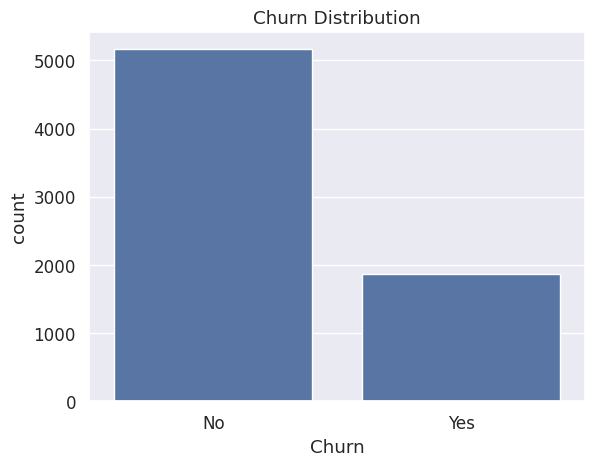

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [13]:
# CLASS DISTRIBUTION
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)


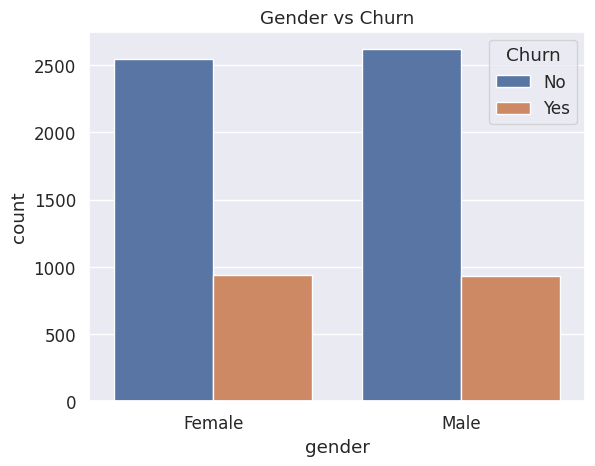

In [15]:
# EDA — CATEGORY VS CHURN

# Gender vs Churn
sns.countplot(data=df, x="gender", hue="Churn")
plt.title("Gender vs Churn")
plt.show()


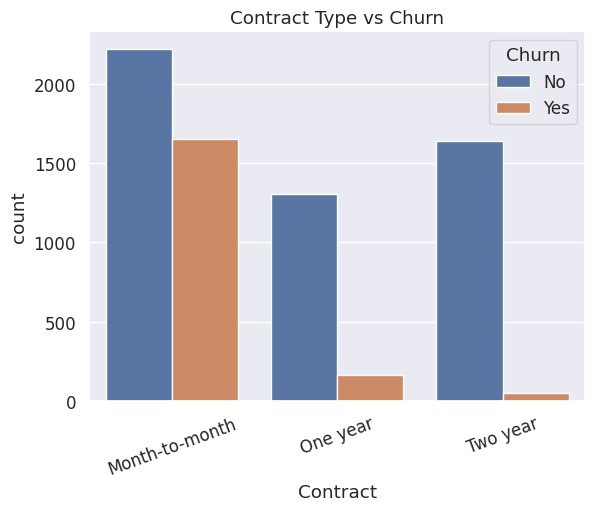

In [17]:
# Contract Type vs Churn
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


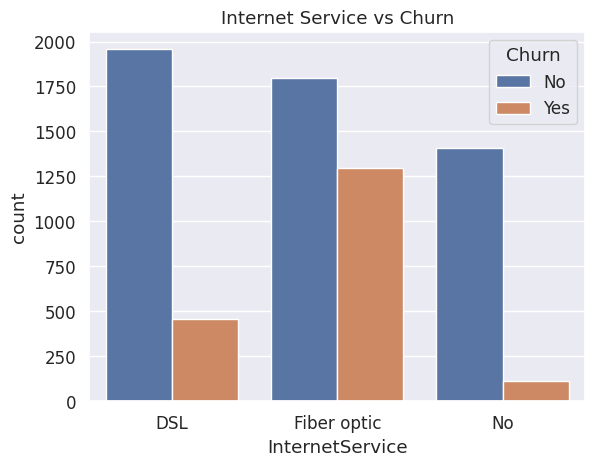

In [18]:
# Internet Service vs Churn
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.show()
